In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:

df = pd.read_csv("")

FileNotFoundError: [Errno 2] No such file or directory: '/Users/visheshrao/Delhi_Pollution_trend-_analysis/dataset/final_dataset.csv'

# Brief Discription

In [45]:
df.head()

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
0,1,1,2021,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462
1,2,1,2021,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482
2,3,1,2021,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263
3,4,1,2021,0,1,89.55,132.08,153.98,10.42,1.01,49.19,207
4,5,1,2021,0,2,54.06,55.54,122.66,9.70,0.64,48.88,149


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1461 non-null   int64  
 1   Month           1461 non-null   int64  
 2   Year            1461 non-null   int64  
 3   Holidays_Count  1461 non-null   int64  
 4   Days            1461 non-null   int64  
 5   PM2.5           1461 non-null   float64
 6   PM10            1461 non-null   float64
 7   NO2             1461 non-null   float64
 8   SO2             1461 non-null   float64
 9   CO              1461 non-null   float64
 10  Ozone           1461 non-null   float64
 11  AQI             1461 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 137.1 KB


In [47]:
df.describe()

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
count,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,15.729637,6.522930,2022.501027,0.189596,4.000684,90.774538,218.219261,37.184921,20.104921,1.025832,36.338871,202.210815
std,8.803105,3.449884,1.118723,0.392116,2.001883,71.650579,129.297734,35.225327,16.543659,0.608305,18.951204,107.801076
min,1.000000,1.000000,2021.000000,0.000000,1.000000,0.050000,9.690000,2.160000,1.210000,0.270000,2.700000,19.000000
25%,8.000000,4.000000,2022.000000,0.000000,2.000000,41.280000,115.110000,17.280000,7.710000,0.610000,24.100000,108.000000
50%,16.000000,7.000000,2023.000000,0.000000,4.000000,72.060000,199.800000,30.490000,15.430000,0.850000,32.470000,189.000000
75%,23.000000,10.000000,2024.000000,0.000000,6.000000,118.500000,297.750000,45.010000,26.620000,1.240000,45.730000,284.000000
max,31.000000,12.000000,2024.000000,1.000000,7.000000,1000.000000,1000.000000,433.980000,113.400000,4.700000,115.870000,500.000000


# DATA CLEANING

In [48]:
# Show nulls, duplicates, numerical column count
def data_details(data):
    print(f'Nulls: {data.isnull().sum().sum()}')
    print(f'Duplicates: {data.duplicated().sum()}')
    print(f'Numerical columns: {len(data.select_dtypes(include="number").columns)}')
    
data_details(df)

Nulls: 0
Duplicates: 0
Numerical columns: 12


In [49]:
# Map Holiday boolean to string, then drop count column
if 'Holidays_Count' in df.columns:
    df['Holiday'] = df['Holidays_Count'].map({1: 'Holiday', 0: 'No Holiday'})
    df.drop('Holidays_Count', axis=1, inplace=True)
    print('Holiday column created and Holidays_Count column dropped.')
else:
    print('Warning: Holidays_Count column not found. Holiday column may already exist.')

Holiday column created and Holidays_Count column dropped.


In [50]:
#Let's see our data again
df.head()

,Date,Month,Year,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI,Holiday
0,1,1,2021,5,408.80,442.42,160.61,12.95,2.77,43.19,462,No Holiday
1,2,1,2021,6,404.04,561.95,52.85,5.18,2.60,16.43,482,No Holiday
2,3,1,2021,7,225.07,239.04,170.95,10.93,1.40,44.29,263,Holiday
3,4,1,2021,1,89.55,132.08,153.98,10.42,1.01,49.19,207,No Holiday
4,5,1,2021,2,54.06,55.54,122.66,9.70,0.64,48.88,149,No Holiday


# Outlier Detection and Imputation

In [54]:
import matplotlib.pyplot as plt

# Thresholds from CPCB/WHO/regulatory bodies
filters = {
    # WHO 2021 Air Quality Guidelines (24-hour or specified averaging period, µg/m³ except CO in mg/m³)
    "PM2.5": 15,      # 24-hour mean (99th percentile, 3-4 exceedances/year allowable)
    "PM10": 45,       # 24-hour mean (99th percentile)
    "NO2": 25,        # 24-hour mean (interim target 2)
    "SO2": 40,        # 24-hour mean
    "CO": 4,          # 24-hour mean (mg/m³)
    "Ozone": 100,     # 8-hour mean (interim target 2)
    # "AQI": Not included as it's derived from pollutants above
}

def detect_outliers(df, filters):
        # Select only pollutant columns for outlier detection (exclude metadata)
    pollutant_cols = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Ozone']
    num_cols = [col for col in pollutant_cols if col in df.columns]
    outlier_report = {}
    for col in num_cols:
        for col in num_cols:
            # IQR-based
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            iqr_outliers = df[(df[col] < lower) | (df[col] > upper)].index
            
            # Preset threshold-based
            if col in filters:
                rule_outliers = df[df[col] > filters[col]].index
            else:
                rule_outliers = []
            
            outlier_report[col] = {
                "iqr_count": len(iqr_outliers),
                "rule_count": len(rule_outliers),
                "iqr_idx": iqr_outliers,
                "rule_idx": rule_outliers
            }
            
            print(f"{col}: IQR outliers = {len(iqr_outliers)}, Threshold outliers = {len(rule_outliers)}")
        return outlier_report

outlier_report = detect_outliers(df, filters)


PM2.5: IQR outliers = 65, Threshold outliers = 1432
PM10: IQR outliers = 19, Threshold outliers = 1413
NO2: IQR outliers = 85, Threshold outliers = 905
SO2: IQR outliers = 83, Threshold outliers = 163
CO: IQR outliers = 80, Threshold outliers = 2
Ozone: IQR outliers = 57, Threshold outliers = 11


In [55]:
# Impute BOTH types of outliers with median
def impute_outliers(df, outlier_report):
    for col, report in outlier_report.items():
        median = df[col].median()
        # Combine all outlier indices (avoid imputing twice)
        all_idx = set(report["iqr_idx"]).union(set(report["rule_idx"]))
        df.loc[list(all_idx), col] = median
    print("Outliers imputed for all numerical columns.")
    return df

df = impute_outliers(df, outlier_report)

Outliers imputed for all numerical columns.


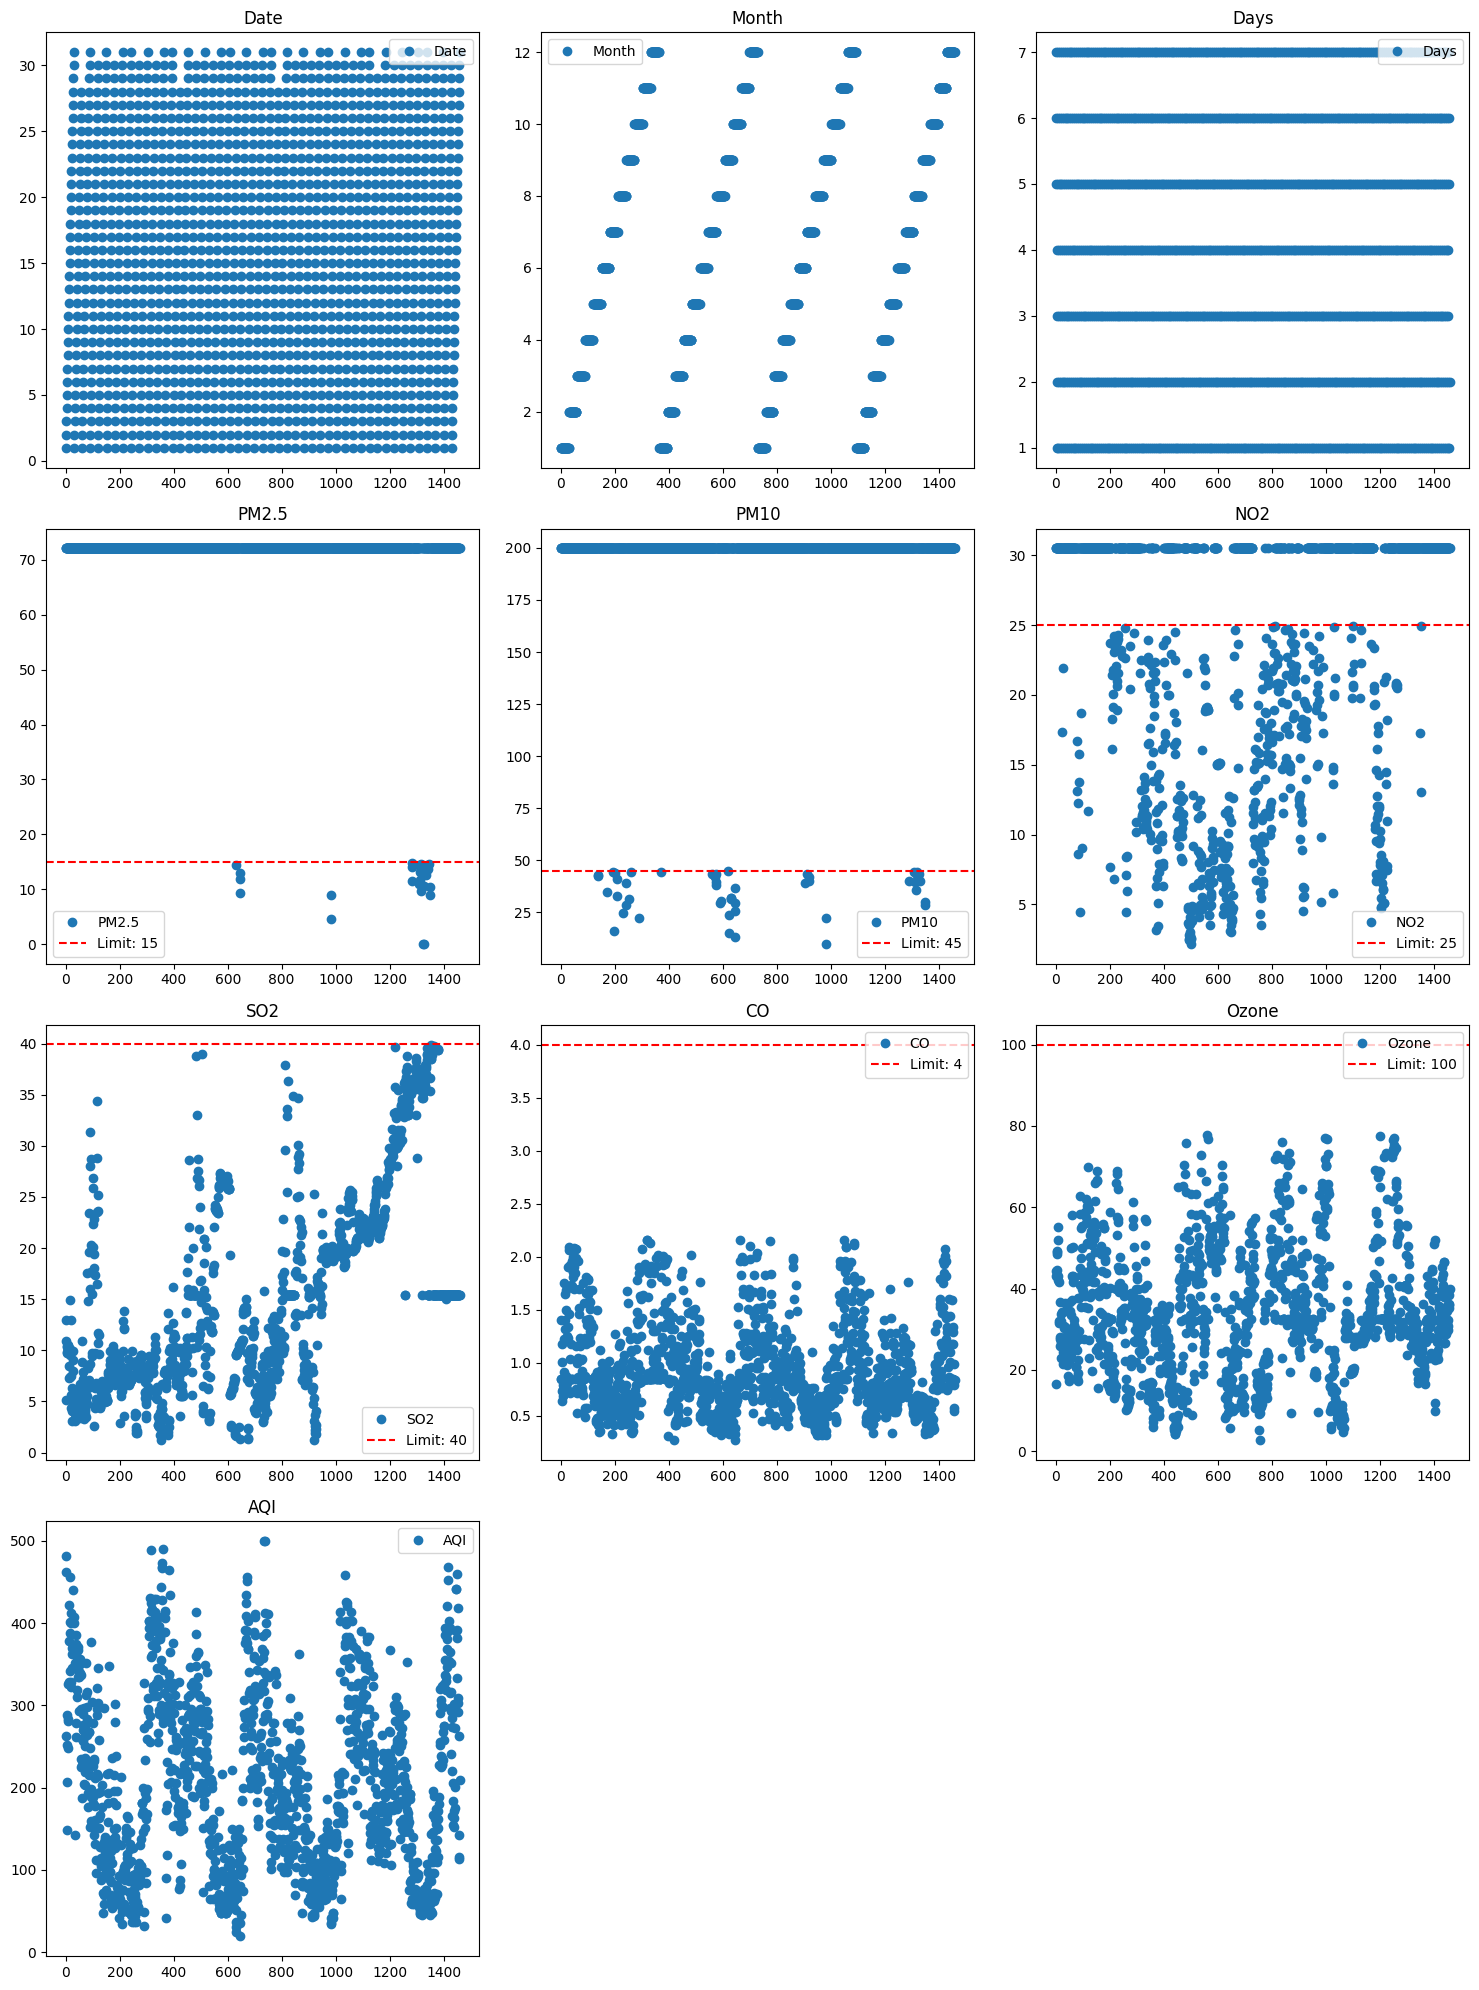

In [56]:
import math

num_cols = df.select_dtypes(include='number').columns.drop('Year')
n = len(num_cols)
rows = math.ceil(n / 3)  # Make grid 3 columns wide for readability

plt.figure(figsize=(15, 5 * rows))
for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, 3, i)
    plt.plot(df[col].values, marker='o', linestyle='', label=col)
    if col in filters:
        plt.axhline(y=filters[col], color='red', linestyle='--', label=f'Limit: {filters[col]}')
    plt.title(col)
    plt.legend()
plt.tight_layout()
plt.show()


In [57]:
# Save cleaned dataframe to CSV
df.to_csv("delhi_air_quality_cleaned.csv", index=False)
